<a href="https://colab.research.google.com/github/guebin/IP2023WIN/blob/main/posts/Day2/06_Functions, ControlFlow/2023-01-31-Lesson11.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# ref

<https://guebin.github.io/DV2022/posts/2022-10-12-6wk-12.html>

# imports

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# lambda, map ($\star$)

## lambda 

`-` 예제1: 람다표현식(lambda expression)자체가 하나의 오브젝트임 

In [2]:
lambda x: (x-2)**2 ### lambda x: (x-2)**2 가 실행되는 순간 메모리상에 함수 오브젝트가 저장됨 

<function __main__.<lambda>(x)>

- "lambda x: (x-2)**2" 는 $lambda(x)=(x-2)^2$의 느낌으로 기억하면 쉬움 

**(사용방법)**

In [192]:
(lambda x: (x-2)**2)(2) # 입력2 -> 출력 (2-2)^2 =0 

0

In [10]:
(lambda x: (x-2)**2)(5) # 입력5 -> 출력 (5-2)^2 =9

9

In [11]:
(lambda x: (x-2)**2)(6) # 입력6 -> 출력 (6-2)^2 =16

16

In [12]:
(lambda x: (x-2)**2)(-2) # 입력-2 -> 출력 (-2-2)^2 =16

16

**Quiz**

$f(x)=\sqrt{x}$ 를 수행하는 함수를 lambda를 이용하여 구성하라. 

`-` 예제2: 람다표현식에 이름을 줄 수 있음. 

In [196]:
f = lambda x: (x-2)**2

In [197]:
f(2),f(4),f(6),f(-2)

(0, 4, 16, 16)

위의 코드는 아래와 같다. 

In [198]:
def f(x):
    return (x-2)**2
f(2),f(4),f(6),f(-2)

(0, 4, 16, 16)

`-` 예제3: 조건부 출력

In [32]:
f = lambda x,y: x if x>y else y # x,y가 입력 -> x>y 일때만 x를 리턴하고 그렇지않으면 y를 리턴 = 큰값을 리턴하라는 소리임 

In [33]:
f(1,20)

20

**Quiz**

임의의 알파벳 문자열을 입력으로 하고, 알파벳이 대문자이면 "대문자 입니다"를 출력하고 소문자이면 "소문자 입니다"를 출력하는 함수를 구성하라. 

(힌트) 아래코드 이용 

In [54]:
'a'.isupper()

False

`-` 예제4: 람다표현식들의 리스트 

In [67]:
fl = [lambda x: x, lambda x: x**2, lambda x: x**3]

In [102]:
for f in fl: 
    print(f(2))

2
4
8


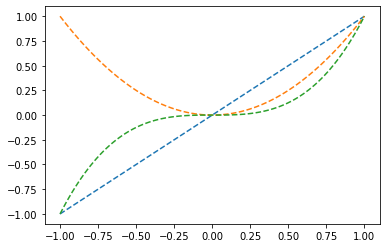

In [92]:
x = np.linspace(-1,1,100)
for f in fl:
    plt.plot(x,f(x),'--') 

`-` 예제5: 람다표현식들의 딕셔너리 

In [115]:
fd = {'f1':lambda x: x, 'f2':lambda x: x**2, 'f3':lambda x: x**3}
fd

{'f1': <function __main__.<lambda>(x)>,
 'f2': <function __main__.<lambda>(x)>,
 'f3': <function __main__.<lambda>(x)>}

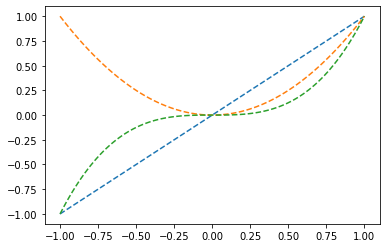

In [121]:
for k in fd:
    plt.plot(x,fd[k](x),'--')

`-` 예제6: 람다표현식을 리턴하는 함수 (함수를 리턴하는 함수) 

(예비학습) 함수 $g(x)$가 정의되어 있을때 $\frac{d}{dx}g(x)$의 값을 계산해보기 

In [132]:
g = lambda x: x**2 

In [133]:
gg = lambda x : (g(x+0.001)-g(x))/0.001

In [134]:
gg(4)

8.0010000000037

(목표) 도함수를 구해주는 `derivate` 함수를 정의하자. 이 함수는 임의의 함수 g를 입력으로 받으면, g의 도함수(gg)가 리턴되는 기능을 가진다. 

In [135]:
def derivate(g):
    return lambda x : (g(x+0.001)-g(x))/0.001

(사용1)

In [129]:
gg = derivate(g) 

In [212]:
x = np.linspace(0,6.28,1000) 

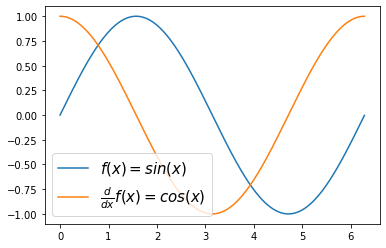

In [213]:
plt.plot(x,g(x),label=r'$f(x)=sin(x)$')
plt.plot(x,gg(x),label=r'$\frac{d}{dx}f(x)=cos(x)$')
plt.legend(fontsize=15)

(사용2)

In [146]:
g0 = lambda x: (1/6)*x**3
g1 = derivate(g0) # (1/2)x^2 
g2 = derivate(g1) # x 

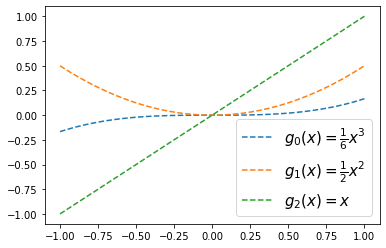

In [147]:
x = np.linspace(-1,1,100)
plt.plot(x,g0(x),'--',label=r'$g_0(x)=\frac{1}{6}x^3$')
plt.plot(x,g1(x),'--',label=r'$g_1(x)=\frac{1}{2}x^2$')
plt.plot(x,g2(x),'--',label=r'$g_2(x)=x$')
plt.legend(fontsize=15)

`-` 예제7: 예제6의 다른표현 

In [148]:
derivate = lambda g: lambda x : (g(x+0.001)-g(x))/0.001

(사용1)

In [149]:
g = lambda x: np.sin(x) 

In [150]:
gg = derivate(g) 

In [151]:
x = np.linspace(0,6.28,1000) 

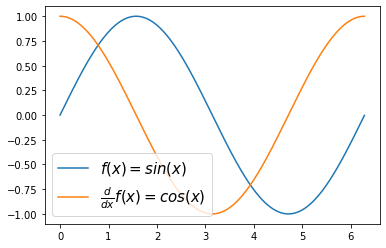

In [152]:
plt.plot(x,g(x),label=r'$f(x)=sin(x)$')
plt.plot(x,gg(x),label=r'$\frac{d}{dx}f(x)=cos(x)$')
plt.legend(fontsize=15)

(사용2)

In [153]:
g0 = lambda x: (1/6)*x**3
g1 = derivate(g0) # (1/2)x^2 
g2 = derivate(g1) # x 

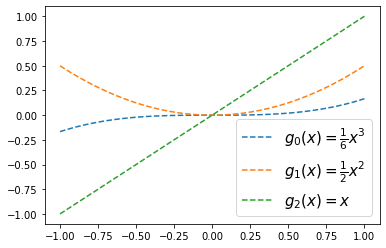

In [154]:
x = np.linspace(-1,1,100)
plt.plot(x,g0(x),'--',label=r'$g_0(x)=\frac{1}{6}x^3$')
plt.plot(x,g1(x),'--',label=r'$g_1(x)=\frac{1}{2}x^2$')
plt.plot(x,g2(x),'--',label=r'$g_2(x)=x$')
plt.legend(fontsize=15)

## map 

`-` 개념: $\text{map}\left(f,[x_1,x_2,\dots,x_n] \right)=\left[f(x_1),f(x_2),\dots,f(x_n) \right] $

`-` 예제1: 

In [166]:
x = [1,2,3] 
f = lambda x: x+1 
y = list(map(f,x))

(다른구현1)

In [136]:
list(map(lambda x: x+1,[1,2,3]))

[2, 3, 4]

(다른구현2)

In [176]:
f = lambda x: x+1 
[f(xi) for xi in [1,2,3]]

[2, 3, 4]

(다른구현3)

In [140]:
[(lambda x: x+1)(xi) for xi in [1,2,3]]

[2, 3, 4]

(다른구현4)--최악

In [178]:
y = [] 
x = [1,2,3] 
f = lambda x: x+1 
for xi in x:
    y.append(f(xi))

In [179]:
y

[2, 3, 4]

(다른구현5)--더 최악

In [143]:
y = [] 
x = [1,2,3] 
f = lambda x: x+1 
for i in range(len(x)):
    y.append(f(x[i]))

In [144]:
y

[2, 3, 4]

**Quiz**

$x=[1,2,3,4,5]$에 대하여 $x^2$을 수행하는 함수를 구현하라. 

`-` 예제2: 문자열을 입력으로 받고 대문자이면 True, 소문자이면 False 
```
입력: A,B,C,a,b,c
출력: T,T,T,F,F,F
```

In [210]:
x= list('ABCabc')
# x = ['A','B','C','a','b','c']
f = lambda s: s.isupper()
y = list(map(f,x))

In [211]:
x,y

(['A', 'B', 'C', 'a', 'b', 'c'], [True, True, True, False, False, False])

`-` 예제3: 두개의 입력을 받는 함수 (map을 이용하는 것이 리스트 컴프리헨션보다 조금 편한것 같다) 

In [268]:
list(map(lambda x,y: x+y, [1,2,3],[-1,-2,-3]))

[0, 0, 0]

(다른구현)-- 리스트컴프리헨션 

In [269]:
f = lambda x,y: x+y 
[f(x,y) for x,y in zip([1,2,3],[-1,-2,-3])] 

[0, 0, 0]

**quiz**

In [216]:
t=np.linspace(-3.14,3.14,100)
x=np.sin(t)
y=np.cos(t)

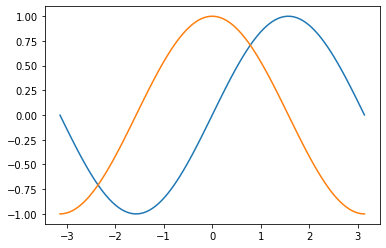

In [218]:
plt.plot(t,x)
plt.plot(t,y)

$f(x,y) = max(x,y)$ 를 구현하여 ${\bf x}$,${\bf y}$ 각 원소에 적용하고 결과를 시각화 하라. 

In [231]:
f = (lambda x,y: max(x,y))
f(3,4)

4

In [236]:
z= list(map(f,x,y))

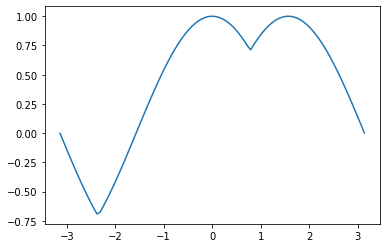

In [238]:
plt.plot(t,z)

`-` 예제4: map은 "하나의 함수에 다양한 입력"을 적용하는 경우에만 사용가능, 리스트컴프리헨션은 "다양한 함수에 다양한 입력" 지원 

In [239]:
flst = [lambda x: x+1, lambda x: x+2, lambda x:x+3] 

map으로 구현시도 $\to$ 실패 

In [259]:
list(map(flst,[-1,-2,-3])) # 결과가 0,0,0

TypeError: 'list' object is not callable

리스트컴프리헨션으로 구현시도 $\to$ 성공 

In [272]:
[f(x) for f,x in zip(flst,[-1,-2,-3])]

[0, 0, 0]

`-` 종합: map과 리스트컴프리헨션과 비교

- map은 for문을 위한 $i$등의 인덱스를 쓰지 않지만 리스트컴프리헨션은 필요함 
- map은 좀더 리스트컴프리헨션보다 제약적으로 사용할 수 밖에 없음. 

# Quiz

## `1`.

아래와 같은 수열이 있다고 하자. 

In [268]:
x=np.random.randint(low=0,high=5,size=100)
x

array([1, 1, 4, 0, 2, 3, 2, 1, 4, 4, 0, 0, 3, 0, 1, 3, 1, 0, 0, 1, 2, 1,
       1, 0, 0, 1, 2, 1, 2, 0, 0, 1, 3, 4, 0, 0, 3, 0, 0, 0, 3, 4, 3, 4,
       0, 3, 0, 0, 4, 0, 4, 0, 3, 3, 4, 0, 4, 2, 0, 1, 1, 1, 3, 0, 1, 1,
       4, 1, 1, 4, 1, 0, 4, 2, 1, 2, 0, 0, 1, 3, 3, 2, 0, 3, 3, 3, 0, 4,
       2, 1, 3, 0, 2, 3, 0, 3, 4, 2, 1, 3])

${\tt x}$의 각 원소에 아래와 같은 변환을 수행하라. 

- 0 $\to$ '사과'
- 1 $\to$ '배'
- 2 $\to$ '오렌지'
- 3 $\to$ '자동차'
- 4 $\to$ '오토바이'

In [279]:
_dct = {0:'사과',1:'배',2:'오렌지',3:'자동차',4:'오토바이'}
lst = list(map(lambda x: _dct[x],x))
lst[:10] # 첫 10개만 출력

['배', '배', '오토바이', '사과', '오렌지', '자동차', '오렌지', '배', '오토바이', '오토바이']

## `2`. 

1의 결과에서 아래와 같은 변환을 수행하라. 

- '사과' $\to$ '과일'
- '배' $\to$ '과일'
- '오렌지' $\to$ '과일'
- '자동차' $\to$ '탈것'
- '오토바이' $\to$ '탈것'

In [284]:
_dct = {'과일':['사과','배','오렌지'],'탈것':['자동차','오토바이']}
rslt = [key for l in lst for key in _dct if l in _dct[key]]
rslt[:10] # 첫 10개만 출력

['과일', '과일', '탈것', '과일', '과일', '탈것', '과일', '과일', '탈것', '탈것']